## 1. Импорт пакетов и файла

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from catboost import CatBoostRegressor
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузка данных
data = pd.read_csv('real_estate_data.csv')

In [3]:
data.head()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


### Описание данных

Признаки:
- type - Тип недвижимости
- sub_type - Подгруппа типа недвижимости
- start_date - Дата начала размещения объявления на рынке
- end_date - Дата окончания размещения объявления на рынке
- listing_type - Тип объявления
- tom - Время нахождения на рынке
- building_age - Возраст здания
- total_floor_count - Количество этажей в здании
- room_count - Количество комнат в квартире
- size - Площадь дома
- address - Адрес жилья
- furnished - Наличие мебели
- currency - Валюта цены дома
- floor_no - Информация о номере этажа данного объявления
- heating_type - Различные типы систем отопления

Целевой (искомый) признак:
- price - Цена дома (или аренды)

In [4]:
# объём данных (строк и столбцов - объектов и признаков)
data.shape

(403487, 17)

In [5]:
# выводим типы данных
data.dtypes

id                     int64
type                  object
sub_type              object
start_date            object
end_date              object
listing_type           int64
tom                    int64
building_age          object
total_floor_count     object
floor_no              object
room_count            object
size                 float64
address               object
furnished            float64
heating_type          object
price                float64
price_currency        object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

In [7]:
# имена колонок в виде списка
columns = data.columns
columns

Index(['id', 'type', 'sub_type', 'start_date', 'end_date', 'listing_type',
       'tom', 'building_age', 'total_floor_count', 'floor_no', 'room_count',
       'size', 'address', 'furnished', 'heating_type', 'price',
       'price_currency'],
      dtype='object')

In [8]:
# подсчет пропусков
for col in data.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, data[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке type = 0
Кол-во пропусков в колонке sub_type = 0
Кол-во пропусков в колонке start_date = 0
Кол-во пропусков в колонке end_date = 137189
Кол-во пропусков в колонке listing_type = 0
Кол-во пропусков в колонке tom = 0
Кол-во пропусков в колонке building_age = 27390
Кол-во пропусков в колонке total_floor_count = 28021
Кол-во пропусков в колонке floor_no = 35296
Кол-во пропусков в колонке room_count = 0
Кол-во пропусков в колонке size = 146006
Кол-во пропусков в колонке address = 0
Кол-во пропусков в колонке furnished = 403487
Кол-во пропусков в колонке heating_type = 27970
Кол-во пропусков в колонке price = 715
Кол-во пропусков в колонке price_currency = 715


In [9]:
# Проверьте price и price_currency на наличие проблем
print("Счетчик нулей у price:", data['price'].isnull().sum())
print("Счетчик нулей у price_currency:", data['price_currency'].isnull().sum())
print("Уникальные значения price_currency:", data['price_currency'].unique())

Счетчик нулей у price: 715
Счетчик нулей у price_currency: 715
Уникальные значения price_currency: ['TRY' 'GBP' 'EUR' 'USD' nan]


In [10]:
# Конвертация цены в TRY
data['price'] = pd.to_numeric(data['price'], errors='coerce')
def convert_to_try(row):
    try:
        price = row['price']
        if pd.isna(price):
            return np.nan
        rates = {'USD': 41.15, 'EUR': 48.17, 'GBP': 55.60}
        return price * rates.get(row['price_currency'], 1)  # 1 для TRY или unknown
    except:
        return np.nan

data['price_try'] = data.apply(convert_to_try, axis=1)
data = data.dropna(subset=['price_try'])  # Удаляем NaN в цене

In [11]:
# Удаляем строки с пропусками в price_try
print("Строки с NaN в price_try до удаления:", data['price_try'].isnull().sum())
data = data.dropna(subset=['price_try'])
print("Строки с NaN в price_try после удаления:", data['price_try'].isnull().sum())

Строки с NaN в price_try до удаления: 0
Строки с NaN в price_try после удаления: 0


In [12]:
# Удаляем не значимые колонки (оставляем listing_type)
data = data.drop(['id', 'start_date', 'end_date', 'furnished', 'price', 'price_currency'], axis=1)

In [13]:
data['city'] = data['address'].str.split('/').str[0].fillna('Unknown')
data['district'] = data['address'].str.split('/').str[1].fillna('Unknown')
data['neighborhood'] = data['address'].str.split('/').str[2].fillna('Unknown')

In [14]:
data = data.drop(['address'], axis=1)

In [15]:
# Заменям пропуски медианными значениями
data['size'] = data['size'].replace('', np.nan).astype(float)
data['size'].fillna(data['size'].median(), inplace=True)

In [16]:
# Конвертируем building_age в число
data['building_age'] = data['building_age'].replace('0', '0-5 arası').replace('40 ve üzeri', '40').replace('', np.nan)
data['building_age'] = data['building_age'].apply(lambda x: 0 if pd.isna(x) else int(x.split('-')[0]) if 'arası' in str(x) else int(x))

In [17]:
# Конвертируем total_floor_count в число
data['total_floor_count'] = data['total_floor_count'].replace('20 ve üzeri', '20').replace('', np.nan)
data['total_floor_count'] = data['total_floor_count'].apply(lambda x: np.nan if pd.isna(x) else float(x.split('-')[0]) if 'arası' in str(x) else float(x))
data['total_floor_count'].fillna(data['total_floor_count'].median(), inplace=True)

In [18]:
# Конвертируем floor_no в числа
floor_mapping = {
    'Zemin Kat': 0, 'Giriş Katı': 0, 'Yüksek Giriş': 1, 'Bahçe katı': 0,
    'Kot 2': -2, 'Kot1': -1, 'Asma Kat': 0.5, 'Çatı Katı': 100, 'En Üst Kat': 100,
    '20 ve üzeri': 20
}
data['floor_no'] = data['floor_no'].replace(floor_mapping).replace('', np.nan)
data['floor_no'] = pd.to_numeric(data['floor_no'], errors='coerce')
data['floor_no'].fillna(data['floor_no'].median(), inplace=True)

In [19]:
# Конвертируем room_count в числа
def parse_room_count(x):
    if pd.isna(x) or x == '' or x == '+':
        return np.nan
    try:
        parts = x.split('+')
        return sum(int(part) for part in parts if part.strip().isdigit())
    except:
        return np.nan

In [20]:
data['room_count'] = data['room_count'].apply(parse_room_count)
data['room_count'].fillna(data['room_count'].median(), inplace=True)

In [21]:
# Фильтрация выбросов
data = data[(data['price_try'] > 1000) & (data['price_try'] < 1e9)]
data = data[(data['size'] > 10) & (data['size'] < 5000)]

In [22]:
# Разделяем на категории
categorical_cols = ['type', 'sub_type', 'heating_type', 'district', 'neighborhood', 'city']
label_encoders = {}
for col in categorical_cols:
    data[col] = data[col].replace('', np.nan).fillna('Unknown')
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

In [23]:
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

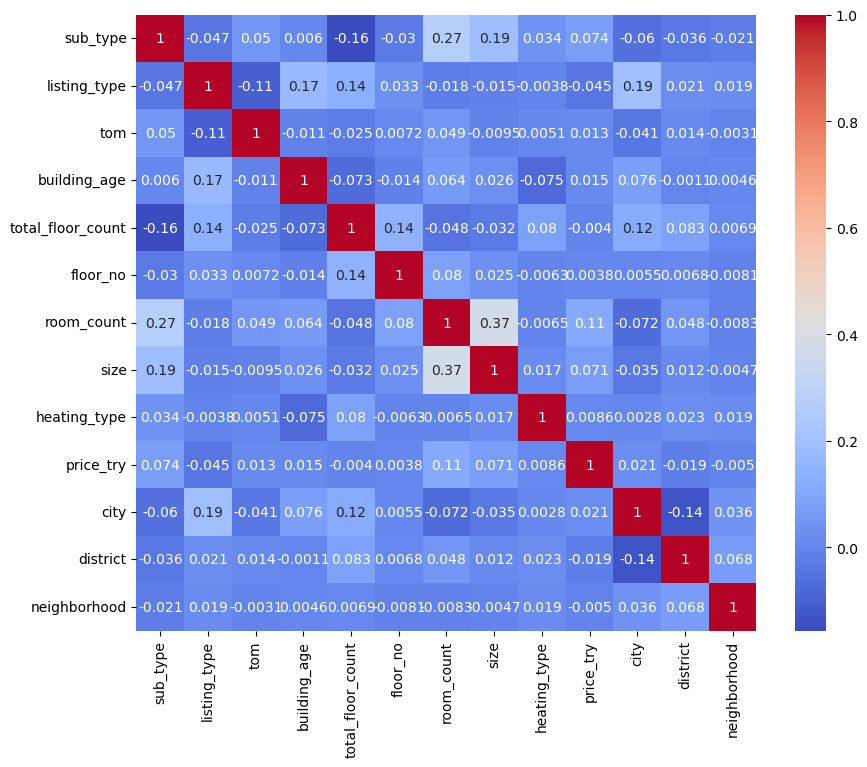

In [24]:
# Матрица корреляций
corr_matrix = data.drop(columns=['type']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [25]:
# Определяем свойства и целевую переменную
X = data.drop('price_try', axis=1)
y = data['price_try']

In [26]:
# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
def process_listing_type(data, listing_type, numeric_cols, low_card_cols, high_card_cols):
    # Фильтрация и предобработка
    data_type = data[data['listing_type'] == listing_type].copy()
    # Для продажи (1): строгие лимиты для высоких цен
    if listing_type == 1:
        data_type = data_type[(data_type['price_try'] > 1000) & (data_type['price_try'] < 1e6)]
        data_type = data_type[(data_type['size'] > 20) & (data_type['size'] < 300)]
    # Для аренды (2): более мягкие лимиты
    else:
        data_type = data_type[(data_type['price_try'] > 2000) & (data_type['price_try'] < 5e4)]  # 2000–50K TRY
        data_type = data_type[(data_type['size'] > 15) & (data_type['size'] < 150)]
    data_type = data_type[data_type['floor_no'] > 0]
    data_type = data_type.drop_duplicates()
    data_type['price_try'] = np.log1p(data_type['price_try'])
    data_type['size'] = np.log1p(data_type['size'])
    data_type['tom'] = np.log1p(data_type['tom'])  # Логарифм для tom

    # Подготовка данных
    X = data_type.drop('price_try', axis=1)
    y = data_type['price_try']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # TargetEncoder
    target_encoder = TargetEncoder(cols=high_card_cols)
    X_train[high_card_cols] = target_encoder.fit_transform(X_train[high_card_cols], y_train)
    X_test[high_card_cols] = target_encoder.transform(X_test[high_card_cols])

    return X_train, X_test, y_train, y_test

In [28]:
low_card_cols = ['type', 'sub_type', 'heating_type']
high_card_cols = ['city', 'district', 'neighborhood']
numeric_cols = ['tom', 'building_age', 'total_floor_count', 'floor_no', 
                'room_count', 'size']

# Обработка для listing_type 1 (продажа) и 2 (аренда)
X_train_sale, X_test_sale, y_train_sale, y_test_sale = process_listing_type(data, 1, numeric_cols, low_card_cols, high_card_cols)
X_train_rent, X_test_rent, y_train_rent, y_test_rent = process_listing_type(data, 2, numeric_cols, low_card_cols, high_card_cols)

In [29]:
X_train_sale.dtypes

type                   int64
sub_type               int64
listing_type           int64
tom                  float64
building_age           int64
total_floor_count    float64
floor_no             float64
room_count           float64
size                 float64
heating_type           int64
city                 float64
district             float64
neighborhood         float64
dtype: object

In [30]:
X_train_rent.dtypes

type                   int64
sub_type               int64
listing_type           int64
tom                  float64
building_age           int64
total_floor_count    float64
floor_no             float64
room_count           float64
size                 float64
heating_type           int64
city                 float64
district             float64
neighborhood         float64
dtype: object

In [31]:
# Модели
rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_leaf=2, max_features='sqrt', n_jobs=-1, random_state=42)
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=10, min_child_samples=15, 
                              force_row_wise=True, num_leaves=50, random_state=42, verbose=-1)
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=10, verbose=0)
stacking_model = StackingRegressor(
    estimators=[('dt', DecisionTreeRegressor(max_depth=20, random_state=42)), ('ridge', Ridge(alpha=0.5))],
    final_estimator=LinearRegression(), cv=5
)

models = {
    'Random Forest': rf_model,
    'LightGBM': lgb_model,
    'CatBoost': cat_model,
    'Stacking': stacking_model
}

Results for Listing Type 1 (Sale)
Random Forest - MSE: 9055505497.69, RMSLE: 0.30, R2: 0.71
Cross-validation R2 for Random Forest: 0.73 ± 0.01
LightGBM - MSE: 10124555703.09, RMSLE: 0.31, R2: 0.68
Cross-validation R2 for LightGBM: 0.70 ± 0.01
CatBoost - MSE: 10645949685.46, RMSLE: 0.32, R2: 0.66
Cross-validation R2 for CatBoost: 0.68 ± 0.01
Stacking - MSE: 9530975415.44, RMSLE: 0.31, R2: 0.70
Cross-validation R2 for Stacking: 0.69 ± 0.01

Best Model: Random Forest with MSE: 9055505497.69 and R2: 0.71


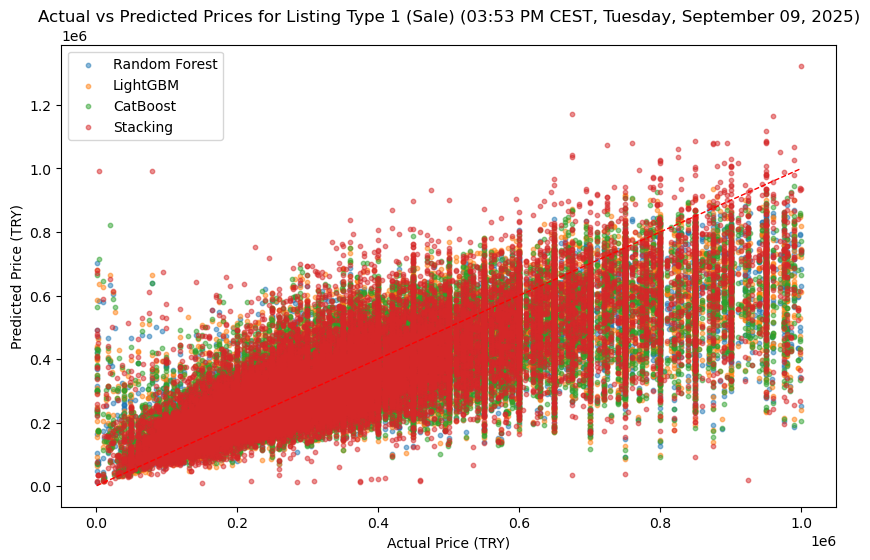

Results for Listing Type 2 (Rent)
Random Forest - MSE: 21231401.63, RMSLE: 0.38, R2: 0.55
Cross-validation R2 for Random Forest: 0.74 ± 0.01
LightGBM - MSE: 20475811.66, RMSLE: 0.39, R2: 0.57
Cross-validation R2 for LightGBM: 0.75 ± 0.02
CatBoost - MSE: 21352220.76, RMSLE: 0.39, R2: 0.55
Cross-validation R2 for CatBoost: 0.73 ± 0.02
Stacking - MSE: 22832195.88, RMSLE: 0.42, R2: 0.52
Cross-validation R2 for Stacking: 0.68 ± 0.03

Best Model: LightGBM with MSE: 20475811.66 and R2: 0.57


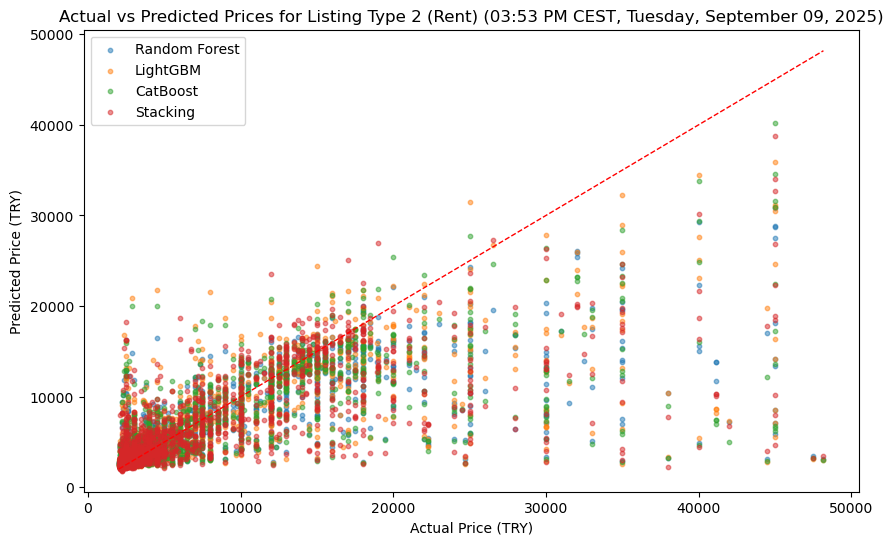

In [32]:
for listing_type, (X_train, X_test, y_train, y_test), label in [
    (1, (X_train_sale, X_test_sale, y_train_sale, y_test_sale), 'Sale'),
    (2, (X_train_rent, X_test_rent, y_train_rent, y_test_rent), 'Rent')
]:
    print(f"Results for Listing Type {listing_type} ({label})")
    results = {}
    predictions = {}
    for name, model in models.items():
        pipeline = Pipeline([('preprocessor', ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_cols),
                ('cat_low', OneHotEncoder(handle_unknown='ignore', sparse_output=False), low_card_cols)
            ],
            remainder='passthrough'
        )), ('model', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_pred = np.expm1(y_pred)
        y_test_exp = np.expm1(y_test)
        mse = mean_squared_error(y_test_exp, y_pred)
        rmsle = np.sqrt(mean_squared_log_error(y_test_exp, y_pred))
        r2 = r2_score(y_test_exp, y_pred)
        results[name] = {'MSE': mse, 'RMSLE': rmsle, 'R2': r2}
        predictions[name] = y_pred
        print(f"{name} - MSE: {mse:.2f}, RMSLE: {rmsle:.2f}, R2: {r2:.2f}")
        # Кросс-валидация
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
        print(f"Cross-validation R2 for {name}: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
        with open(f'{label.lower()}_{name.replace(" ", "_").lower()}_model.pkl', 'wb') as f:
                pickle.dump(pipeline, f)
    # Find the best model
    best_model = min(results.items(), key=lambda x: x[1]['MSE'])
    print(f"\nBest Model: {best_model[0]} with MSE: {best_model[1]['MSE']:.2f} and R2: {best_model[1]['R2']:.2f}")
    # Визуализация
    plt.figure(figsize=(10, 6))
    for name, y_pred in predictions.items():
        plt.scatter(y_test_exp, y_pred, alpha=0.5, label=name, s=10)
    plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'r--', lw=1)
    plt.xlabel('Actual Price (TRY)')
    plt.ylabel('Predicted Price (TRY)')
    plt.title(f'Actual vs Predicted Prices for Listing Type {listing_type} ({label}) (03:53 PM CEST, Tuesday, September 09, 2025)')
    plt.legend()
    plt.show()

In [33]:
model_names = ['Random Forest', 'LightGBM', 'CatBoost', 'Stacking']

In [42]:
correct_columns = ['type', 'sub_type', 'listing_type', 'tom', 'building_age', 
                  'total_floor_count', 'floor_no', 'room_count', 'size', 
                  'heating_type', 'city', 'district', 'neighborhood']

new_data = pd.DataFrame([{
    'type': 1,                    # Categorical: e.g., 'Konut'
    'sub_type': 1,               # Categorical: e.g., 'Daire', 'Rezidans'
    'listing_type': 1,                 # Numerical: 1 (sale) or 2 (rent)
    'tom': 30,                         # Numerical: time on market
    'building_age': 5,                 # Numerical: age of building
    'total_floor_count': 15,           # Numerical: total floors
    'floor_no': 3,                   # Categorical: e.g., '3', 'Yüksek Giriş'
    'room_count': 3,               # Categorical: e.g., '2+1', '1+0'
    'size': 100,                       # Numerical: size in square meters
    'heating_type': 1,         # Categorical: e.g., 'Fancoil'
    'city': 78,                # Categorical: e.g., 'İstanbul'
    'district': 223,              # Categorical: e.g., 'Kartal'
    'neighborhood': 1428       # Categorical: e.g., 'Kordonboyu'
}], columns=correct_columns)

label = "sale"

new_data

,type,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,city,district,neighborhood
0,1,1,1,30,5,15,3,3,100,1,78,223,1428


In [43]:
for name in model_names:
        file_name = f'{label.lower()}_{name.replace(" ", "_").lower()}_model.pkl'
        with open(file_name, 'rb') as f:
            loaded_pipeline = pickle.load(f)
        
        # Предсказание
        prediction = loaded_pipeline.predict(new_data)
        
        prediction = np.expm1(prediction)
        print(f"{name}: {prediction}")

Random Forest: [594669.82335518]
LightGBM: [830014.30288274]
CatBoost: [656646.01861589]
Stacking: [8.50456178e+172]
